In [41]:

import pandas as pd
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [53]:
faithful= data('faithful', show_doc=True)

faithful

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Old Faithful Geyser Data

### Description

Waiting time between eruptions and the duration of the eruption for the Old
Faithful geyser in Yellowstone National Park, Wyoming, USA.

### Usage

    faithful

### Format

A data frame with 272 observations on 2 variables.

[,1]

eruptions

numeric

Eruption time in mins

[,2]

waiting

numeric

Waiting time to next eruption (in mins)

### Details

A closer look at `faithful$eruptions` reveals that these are heavily rounded
times originally in seconds, where multiples of 5 are more frequent than
expected under non-human measurement. For a better version of the eruption
times, see the example below.

There are many versions of this dataset around: Azzalini and Bowman (1990) use
a more complete version.

### Source

W. Härdle.

### References

Härdle, W. (1991) _Smoothing Techniques with Implementation in S_. New York:
Springer.

Azzalini, A. 

In [11]:
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


###### What is pearson's r for the two variables?
eruptions and waiting time

###### Visualize the relationship between the variables.

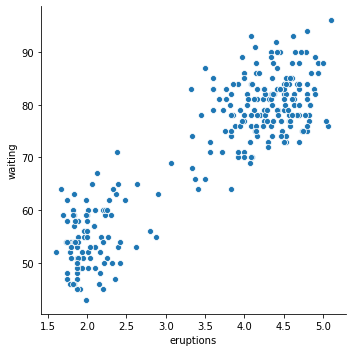

In [12]:
sns.relplot(x="eruptions", y="waiting", data=faithful);

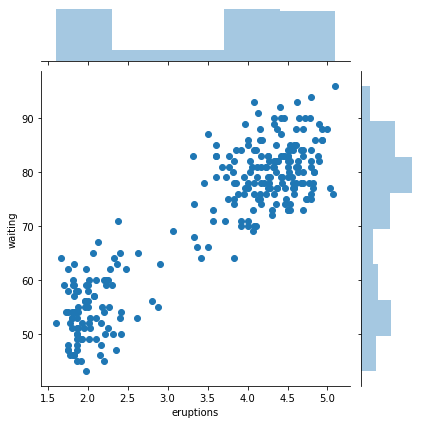

In [30]:
# More time on site, more money spent.
sns.jointplot(x='eruptions',y='waiting',data=faithful)

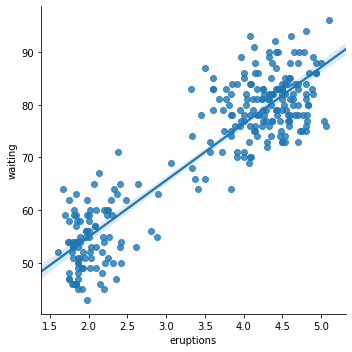

In [31]:
sns.lmplot(x='eruptions',y='waiting',data=faithful)

##### Split datat

In [15]:
 import pandas as pd
from sklearn.model_selection import train_test_split

train, test = train_test_split(faithful, train_size = .80, random_state = 123)

In [16]:
print(train.shape); print(test.shape)

(217, 2)
(55, 2)


In [17]:
X_train = train.drop(columns='waiting')
y_train = train[['waiting']]
X_test = test.drop(columns='waiting')
y_test = test[['waiting']]

In [18]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [33]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# The coefficients
print('Coefficients: \n', lm1.coef_)

Coefficients: 
 [[10.531161]]


#### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!  Use lm.predict() to predict off the X_test set of the data.

In [37]:
predictions = lm1.predict( X_test)

In [38]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.093021022465177
MSE: 27.95260747332221
RMSE: 5.287022552753318


In [39]:
y_pred_lm1 = lm1.predict(X_train)

In [42]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

linear model
  mean squared error: 36.6


In [43]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print((r2_lm1))

0.7976280633930128


Create a visualization with your predictions

waiting should be on the x axis, and eruptions on the y
Use color to differentiate the actual vs predicted values.
Add a descriptive title.
Change the y ticks such that they are all integers (i.e. no decimals)
Add the root mean squared error of your predictions as an annotation

In [48]:
from math import sqrt

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)

print('sum of squared errors\n model: {:.5}'.format(SSE))
print(evs)

sum of squared errors
 model: 3.9205e+04
0.0


In [52]:
pd.DataFrame({'actual': y_train,
              'lm': train.yhat,
              'lm_baseline': train.tax_value})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='waiting', y='eruptions', hue='model')


min, max = 0, 5_000_000
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('waiting vs eruptions')

AttributeError: 'DataFrame' object has no attribute 'yhat'